In [49]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

### 1.  각 나라별 소비건수비율 및 소비금액비율 데이터 가져오기 <hr>

In [50]:
# 각 나라별 소비건수비율 및 소비금액비율 데이터 가져오기
P_DATA='./P_DATA/'
fileList=[]
for filename in os.listdir(P_DATA)[2:]:
  
    filename_ = P_DATA+filename
    fileList.append(filename_)

FILE1='./P_DATA/cost.csv'
FILE2='./P_DATA/number.csv'

In [51]:
costDF=pd.read_csv(FILE1)
numDF=pd.read_csv(FILE2)
for filename in fileList:
    dataDF=pd.read_csv(filename,  encoding='utf-8')
    if '소비건수' in filename:
        numDF=pd.concat([numDF,dataDF])
    else:
        costDF=pd.concat([costDF,dataDF])
print(f"소비금액 :\n{costDF}",end='\n\n')
print(f"소비건수 :\n{numDF}")

소비금액 :
    기준연월    국가명 KTO카테고리소분류  소비금액비율_전체
0   2018     미국       성형외과      28.57
1   2018     미국    대학/종합병원      32.72
2   2018     미국        피부과      11.87
3   2018     미국         치과      13.86
4   2018     미국         약국       6.87
..   ...    ...        ...        ...
37  2023  카자흐스탄         약국       3.04
38  2023  카자흐스탄        피부과       2.00
39  2023  카자흐스탄       한의학과       1.65
40  2023  카자흐스탄         치과       1.37
41  2023  카자흐스탄         안과       0.73

[418 rows x 4 columns]

소비건수 :
    기준연월    국가명 KTO카테고리소분류  소비건수비율_전체
0   2018     미국         약국      47.17
1   2018     미국    대학/종합병원      26.37
2   2018     미국         치과       9.67
3   2018     미국        피부과       6.45
4   2018     미국       성형외과       3.47
..   ...    ...        ...        ...
37  2023  카자흐스탄       성형외과       2.32
38  2023  카자흐스탄       한의학과       1.83
39  2023  카자흐스탄         치과       1.06
40  2023  카자흐스탄        피부과       0.89
41  2023  카자흐스탄         안과       0.67

[418 rows x 4 columns]


In [52]:
# 데이터 기본 정보 확인
print(costDF.info(),end='\n\n')
numDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 41
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준연월        418 non-null    int64  
 1   국가명         418 non-null    object 
 2   KTO카테고리소분류  418 non-null    object 
 3   소비금액비율_전체   418 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 41
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준연월        418 non-null    int64  
 1   국가명         418 non-null    object 
 2   KTO카테고리소분류  418 non-null    object 
 3   소비건수비율_전체   418 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.3+ KB


[1-1] 컬럼명이 마음에 안들어서 변경 <hr>

In [53]:
# 소비 금액 컬럼명 변경
costDF.rename(columns={'기준연월':'년도','KTO카테고리소분류':'진료과목','소비금액비율_전체':'소비금액비율'},inplace=True)
costDF

,년도,국가명,진료과목,소비금액비율
0,2018,미국,성형외과,28.57
1,2018,미국,대학/종합병원,32.72
2,2018,미국,피부과,11.87
3,2018,미국,치과,13.86
4,2018,미국,약국,6.87
...,...,...,...,...
37,2023,카자흐스탄,약국,3.04
38,2023,카자흐스탄,피부과,2.00
39,2023,카자흐스탄,한의학과,1.65
40,2023,카자흐스탄,치과,1.37


In [54]:
# 소비 건수 컬럼명 변경
numDF.rename(columns={'기준연월':'년도','KTO카테고리소분류':'진료과목','소비건수비율_전체':'소비건수비율'},inplace=True)
numDF

,년도,국가명,진료과목,소비건수비율
0,2018,미국,약국,47.17
1,2018,미국,대학/종합병원,26.37
2,2018,미국,치과,9.67
3,2018,미국,피부과,6.45
4,2018,미국,성형외과,3.47
...,...,...,...,...
37,2023,카자흐스탄,성형외과,2.32
38,2023,카자흐스탄,한의학과,1.83
39,2023,카자흐스탄,치과,1.06
40,2023,카자흐스탄,피부과,0.89


[1-2] MultiIndex DataFrame으로 변경 <hr>

In [55]:
# 소비 금액 비율 multiIndex Dataframe으로 변경
changeCost=costDF.pivot_table(
    index=["국가명", "진료과목"], # 행 인덱스
    columns="년도",              # 연도별 열
    values="소비금액비율",        # 채울 값
)
changeCost

년도            2018   2019   2020   2021   2022   2023
국가명 진료과목                                             
대만  대학/종합병원  23.20  18.85  14.60  44.37  15.03   8.45
    성형외과     55.41  65.15  45.68  11.98  49.06  52.97
    안과        0.38   0.15   1.56   1.09   2.15   1.81
    약국        6.58   6.04  22.48   7.26   7.70   5.28
    치과        5.48   3.51   7.68  16.19   9.52   1.78
...            ...    ...    ...    ...    ...    ...
태국  안과        0.40   0.14   0.74   1.30   0.20   0.21
    약국        2.47   3.07   6.08  10.21   2.56   2.12
    치과        1.56   1.30   4.64  17.98   2.22   1.26
    피부과       4.96   2.96   4.29   7.15   5.74  15.76
    한의학과      0.54   0.33   1.30   1.87   0.27   0.23

[70 rows x 6 columns]

In [56]:
# 소비 건수 비율 multiIndex Dataframe으로 변경
changeNum=numDF.pivot_table(
    index=["국가명", "진료과목"], # 행 인덱스
    columns="년도",              # 연도별 열
    values="소비건수비율",        # 채울 값
)
changeNum

년도            2018   2019   2020   2021   2022   2023
국가명 진료과목                                             
대만  대학/종합병원  17.24  13.27  10.68  38.95  15.92   4.02
    성형외과      8.95  10.91   4.65   2.44   8.29  16.17
    안과        0.52   0.64   0.85   1.02   1.23   0.86
    약국       61.81  64.55  72.97  42.58  62.19  66.51
    치과        4.14   3.96   5.36   6.83   5.13   1.63
...            ...    ...    ...    ...    ...    ...
태국  안과        1.00   0.67   0.80   1.21   0.66   0.46
    약국       50.60  58.84  62.05  52.06  60.46  56.27
    치과        3.88   3.23   7.09  10.16   2.64   1.90
    피부과       9.64   5.36   4.13   5.67   6.39  15.11
    한의학과      1.45   1.44   2.20   2.75   0.68   0.63

[70 rows x 6 columns]

[1-3] 결측치가 있는지 확인 및 결측치 해결 <hr>

In [57]:
# 결측치 확인
print(changeCost.isna().sum())
changeNum.isna().sum()

년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    2
dtype: int64


년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    2
dtype: int64

In [58]:
# 결측치 0으로 채우기
changeCost.fillna(0,inplace=True)
changeNum.fillna(0,inplace=True)
print(changeCost.isna().sum(),changeNum.isna().sum(),end='\n\n')

년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64 년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64



### 2. 데이터 정보 확인 및 통계 분석 <hr>

[2-1] 연도별 기본 통계 데이터 <hr>

In [59]:
# 1. 연도별 기본 통계 데이터 (소비금액과 소비건수)
stats_cost = changeCost.describe()
stats_num = changeNum.describe()
print(f"소비금액 :\n{stats_cost}",end='\n\n')
print(f"소비건수 :\n{stats_num}")

# -> 예쁜 데이터가 아니야

소비금액 :
년도          2018       2019       2020       2021       2022       2023
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000
mean   14.285429  14.285429  14.285857  14.285571  14.285714  14.285429
std    22.070548  22.482045  20.422669  20.268466  21.337375  19.982673
min     0.250000   0.140000   0.120000   0.070000   0.180000   0.000000
25%     1.570000   1.392500   1.645000   1.795000   2.337500   2.010000
50%     5.000000   4.170000   6.780000   7.840000   5.855000   5.135000
75%    16.372500  15.365000  16.877500  16.812500  14.440000  15.757500
max    87.110000  90.720000  90.710000  95.410000  90.830000  77.920000

소비건수 :
년도          2018       2019       2020       2021       2022       2023
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000
mean   14.286429  14.285857  14.285429  14.286000  14.286000  14.285857
std    19.293009  19.688584  20.567271  18.153364  19.446673  19.998119
min     0.500000   0.530000   0.400000   0.450000

[2-2] 각 국가별 연도별 상위 비율 진료과목 분석 <hr>

In [60]:
# 2. 각 국가별 연도별 상위 비율 진료과목 분석
# (1) 각 국가마다 연도별 최대금액 진료과목
years=costDF['년도'].unique()
subSR=costDF['진료과목'].unique()
subSR.sort()

for cont in costDF['국가명'].unique():
    print(F"\n{cont}")
    for year in years:
        subidx=changeCost.loc[cont][year].argmax()
        maxprice=changeCost.loc[cont][year].max()
        subSR[subidx]
        print(year,subSR[subidx],maxprice,end='\n')


미국
2018 대학/종합병원 32.72
2019 대학/종합병원 32.25
2020 대학/종합병원 36.35
2021 대학/종합병원 38.81
2022 성형외과 29.36
2023 성형외과 34.96

중국
2018 성형외과 49.18
2019 성형외과 50.39
2020 약국 29.92
2021 대학/종합병원 34.28
2022 성형외과 30.7
2023 피부과 38.18

일본
2018 성형외과 38.09
2019 성형외과 46.69
2020 성형외과 43.12
2021 한의학과 26.29
2022 성형외과 57.57
2023 성형외과 59.74

태국
2018 성형외과 84.81
2019 성형외과 88.7
2020 성형외과 75.01
2021 성형외과 33.79
2022 성형외과 86.32
2023 성형외과 77.88

대만
2018 성형외과 55.41
2019 성형외과 65.15
2020 성형외과 45.68
2021 대학/종합병원 44.37
2022 성형외과 49.06
2023 성형외과 52.97

러시아
2018 대학/종합병원 85.62
2019 대학/종합병원 85.17
2020 대학/종합병원 85.81
2021 대학/종합병원 90.4
2022 대학/종합병원 90.83
2023 성형외과 66.4

몽골
2018 대학/종합병원 79.19
2019 대학/종합병원 72.21
2020 대학/종합병원 82.74
2021 대학/종합병원 93.16
2022 대학/종합병원 74.44
2023 대학/종합병원 58.95

베트남
2018 성형외과 60.92
2019 성형외과 48.82
2020 대학/종합병원 43.62
2021 대학/종합병원 46.02
2022 성형외과 46.99
2023 성형외과 54.19

싱가포르
2018 성형외과 48.73
2019 성형외과 51.18
2020 대학/종합병원 32.79
2021 대학/종합병원 39.46
2022 성형외과 55.43
2023 성형외과 56.37

카자흐스탄
2018 대학/종합병원 87.11
2019 대학/종합병원 9

In [61]:
# (2) 각 국가마다 연도별 최소금액 진료과목
for cont in costDF['국가명'].unique():
    print(F"\n{cont}")
    for year in years:
        subidx=changeCost.loc[cont][year].argmin()
        minprice=changeCost.loc[cont][year].min()
        subSR[subidx]
        print(year,subSR[subidx],minprice,end='\n')


미국
2018 안과 2.22
2019 안과 2.2
2020 안과 2.61
2021 안과 3.37
2022 한의학과 3.64
2023 한의학과 3.32

중국
2018 안과 0.96
2019 안과 0.86
2020 안과 1.11
2021 안과 2.55
2022 안과 3.04
2023 안과 1.39

일본
2018 안과 0.25
2019 안과 0.34
2020 안과 0.46
2021 안과 0.87
2022 안과 0.63
2023 안과 0.31

태국
2018 안과 0.4
2019 안과 0.14
2020 안과 0.74
2021 안과 1.3
2022 안과 0.2
2023 안과 0.21

대만
2018 안과 0.38
2019 안과 0.15
2020 안과 1.56
2021 안과 1.09
2022 안과 2.15
2023 한의학과 1.01

러시아
2018 안과 0.33
2019 안과 0.62
2020 피부과 0.51
2021 안과 0.11
2022 피부과 0.18
2023 안과 0.0

몽골
2018 안과 0.98
2019 안과 1.37
2020 피부과 0.63
2021 피부과 0.07
2022 피부과 1.35
2023 치과 1.83

베트남
2018 안과 0.33
2019 안과 0.28
2020 안과 1.34
2021 안과 1.55
2022 한의학과 1.5
2023 안과 1.29

싱가포르
2018 안과 1.24
2019 안과 0.76
2020 안과 0.64
2021 안과 3.03
2022 안과 1.5
2023 한의학과 1.12

카자흐스탄
2018 안과 0.4
2019 안과 0.53
2020 피부과 0.12
2021 피부과 0.29
2022 안과 0.58
2023 안과 0.73


In [62]:
# (3) 각 국가마다 연도별 최대빈도 진료과목
for cont in numDF['국가명'].unique():
    print(F"\n{cont}")
    for year in years:
        subidx=changeNum.loc[cont][year].argmax()
        maxprice=changeNum.loc[cont][year].max()
        subSR[subidx]
        print(year,subSR[subidx],maxprice,end='\n')


미국
2018 약국 47.17
2019 약국 48.54
2020 약국 50.21
2021 약국 41.05
2022 약국 51.3
2023 약국 54.9

중국
2018 약국 56.27
2019 약국 57.87
2020 약국 73.14
2021 약국 49.48
2022 약국 59.56
2023 약국 65.42

일본
2018 약국 38.95
2019 약국 40.07
2020 약국 45.82
2021 약국 38.39
2022 약국 48.57
2023 약국 49.74

태국
2018 약국 50.6
2019 약국 58.84
2020 약국 62.05
2021 약국 52.06
2022 약국 60.46
2023 약국 56.27

대만
2018 약국 61.81
2019 약국 64.55
2020 약국 72.97
2021 약국 42.58
2022 약국 62.19
2023 약국 66.51

러시아
2018 대학/종합병원 66.99
2019 대학/종합병원 64.25
2020 대학/종합병원 56.38
2021 대학/종합병원 52.66
2022 대학/종합병원 57.27
2023 약국 60.71

몽골
2018 대학/종합병원 62.26
2019 대학/종합병원 58.14
2020 대학/종합병원 45.03
2021 대학/종합병원 59.05
2022 대학/종합병원 53.56
2023 약국 46.12

베트남
2018 약국 60.0
2019 약국 62.52
2020 약국 60.08
2021 약국 49.12
2022 약국 59.98
2023 약국 68.16

싱가포르
2018 약국 43.14
2019 약국 48.46
2020 약국 58.99
2021 대학/종합병원 44.53
2022 약국 55.4
2023 약국 62.25

카자흐스탄
2018 대학/종합병원 79.11
2019 대학/종합병원 76.57
2020 대학/종합병원 68.13
2021 대학/종합병원 67.21
2022 대학/종합병원 64.29
2023 대학/종합병원 57.66


In [63]:
# (4) 각 국가마다 연도별 최소빈도 진료과목
for cont in numDF['국가명'].unique():
    print(F"\n{cont}")
    for year in years:
        subidx=changeNum.loc[cont][year].argmin()
        minprice=changeNum.loc[cont][year].min()
        subSR[subidx]
        print(year,subSR[subidx],minprice,end='\n')


미국
2018 안과 1.91
2019 안과 1.95
2020 안과 1.79
2021 안과 2.05
2022 안과 2.47
2023 안과 2.54

중국
2018 안과 0.86
2019 안과 0.79
2020 안과 0.65
2021 안과 1.42
2022 안과 1.18
2023 안과 0.93

일본
2018 안과 0.6
2019 안과 0.56
2020 안과 0.85
2021 안과 1.17
2022 안과 0.83
2023 안과 0.35

태국
2018 안과 1.0
2019 안과 0.67
2020 안과 0.8
2021 안과 1.21
2022 안과 0.66
2023 안과 0.46

대만
2018 안과 0.52
2019 안과 0.64
2020 안과 0.85
2021 안과 1.02
2022 안과 1.23
2023 안과 0.86

러시아
2018 안과 0.5
2019 피부과 0.54
2020 안과 0.7
2021 안과 0.52
2022 안과 0.67
2023 안과 0.0

몽골
2018 안과 0.85
2019 안과 1.07
2020 안과 0.84
2021 안과 1.03
2022 피부과 1.1
2023 피부과 1.3

베트남
2018 안과 1.28
2019 안과 0.96
2020 안과 1.3
2021 성형외과 1.81
2022 안과 2.27
2023 안과 1.72

싱가포르
2018 안과 1.54
2019 안과 1.77
2020 안과 1.33
2021 안과 1.56
2022 안과 1.47
2023 안과 1.51

카자흐스탄
2018 피부과 0.54
2019 피부과 0.53
2020 피부과 0.4
2021 성형외과 0.45
2022 안과 0.71
2023 안과 0.67


[2-3] 소비금액과 소비건수 간 상관계수 <hr>

In [64]:
# 3. 소비금액과 소비건수 간 상관계수 계산 (연도별로)
# corrwith() : 두 DataFrame객체의 동일한 행/열 간의 상관 계수를 반환하는 메서드
correlation = changeCost.corrwith(changeNum, axis=1)
print(f"상관계수 :\n{correlation}")

상관계수 :
국가명  진료과목   
대만   대학/종합병원    0.979868
     성형외과       0.704297
     안과         0.822919
     약국         0.470749
     치과         0.913395
                  ...   
태국   안과         0.820820
     약국        -0.204221
     치과         0.907641
     피부과        0.869930
     한의학과       0.946220
Length: 70, dtype: float64


In [65]:
corrDF=pd.DataFrame(correlation)
corrDF.columns = ['상관계수']
corrDF
corrDF.to_excel('./금액과 건수 간 상관계수.xlsx')

In [66]:
# 4. 음의 상관계수를 보인 진료과목 따로 확인
n_corr = correlation[correlation< 0] # -> MultiIndex를 가진 Series 타입
n_corrDF=pd.DataFrame(n_corr)
n_corrDF.columns = ['상관계수']
n_corrDF.to_excel('./음의 상관계수.xlsx')
n_corrDF

상관계수
국가명   진료과목          
몽골    치과   -0.381815
      피부과  -0.000959
      한의학과 -0.186046
미국    약국   -0.120099
베트남   약국   -0.066504
카자흐스탄 치과   -0.362751
태국    약국   -0.204221

In [67]:
# reset_index() -> 행 인덱스를 컬럼으로 밀어넣고 정수 인덱스 생성
n_corr_df = n_corr.reset_index()  # MultiIndex를 일반 DataFrame으로 변환
n_corr_df.columns = ["국가명", "진료과목", "상관계수"]  # 컬럼 이름 재설정
print(n_corr_df)

     국가명  진료과목      상관계수
0     몽골    치과 -0.381815
1     몽골   피부과 -0.000959
2     몽골  한의학과 -0.186046
3     미국    약국 -0.120099
4    베트남    약국 -0.066504
5  카자흐스탄    치과 -0.362751
6     태국    약국 -0.204221


### 3. 각 나라별 실제 총 소비건수 및 소비금액 데이터 가져오기<hr>

In [68]:
# 각 나라별 실제 총 소비건수 및 소비금액 데이터 가져오기
FILEA='./T_DATA/실제 외국인 소비액.csv'
FILEB='./T_DATA/실제 외국인 소비건수.csv'
cost2DF=pd.read_csv(FILEA)
num2DF=pd.read_csv(FILEB)

In [69]:
cost2DF

,국가명,기준연월,소비금액
0,대만,2018,1.760000e+09
1,대만,2019,3.610000e+09
2,대만,2020,8.330000e+08
3,대만,2021,4.130000e+08
4,대만,2022,1.440000e+09
5,대만,2023,9.520000e+09
6,러시아,2018,4.120000e+10
7,러시아,2019,5.000000e+10
8,러시아,2020,1.360000e+10
9,러시아,2021,8.130000e+09


In [70]:
# 데이터 기본 정보 확인
print(cost2DF.info())
num2DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가명     60 non-null     object 
 1   기준연월    60 non-null     int64  
 2   소비금액    60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가명     60 non-null     object
 1   기준연월    60 non-null     int64 
 2   소비건수    60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


[3-1] 컬럼명 마음에 안 들어서 변경하기 <hr>

In [71]:
# 소비 금액 컬럼명 변경
cost2DF.rename(columns={'기준연월':'년도'},inplace=True)
cost2DF.head()

,국가명,년도,소비금액
0,대만,2018,1.760000e+09
1,대만,2019,3.610000e+09
2,대만,2020,8.330000e+08
3,대만,2021,4.130000e+08
4,대만,2022,1.440000e+09


In [72]:
cost2DF.tail()

,국가명,년도,소비금액
55,태국,2019,9.320000e+09
56,태국,2020,2.000000e+09
57,태국,2021,4.670000e+08
58,태국,2022,1.130000e+10
59,태국,2023,2.600000e+10


In [73]:
# 소비 건수 컬럼명 변경
num2DF.rename(columns={'기준연월':'년도'},inplace=True)
num2DF.head()

,국가명,년도,소비건수
0,미국,2018,276641
1,미국,2019,331323
2,미국,2020,246121
3,미국,2021,338482
4,미국,2022,508853


In [74]:
num2DF.tail()

,국가명,년도,소비건수
55,대만,2019,9241
56,대만,2020,4942
57,대만,2021,3443
58,대만,2022,7543
59,대만,2023,30664


[3-2] MultiIndex DataFrame으로 변경 <hr>

In [75]:
cost2DF

,국가명,년도,소비금액
0,대만,2018,1.760000e+09
1,대만,2019,3.610000e+09
2,대만,2020,8.330000e+08
3,대만,2021,4.130000e+08
4,대만,2022,1.440000e+09
5,대만,2023,9.520000e+09
6,러시아,2018,4.120000e+10
7,러시아,2019,5.000000e+10
8,러시아,2020,1.360000e+10
9,러시아,2021,8.130000e+09


In [76]:
# 소비 금액 multiIndex Dataframe으로 변경
changeCost2=cost2DF.pivot_table(
    index="국가명",              # 행 인덱스
    columns="년도",              # 연도별 열
    values="소비금액",           # 채울 값
)
changeCost2

년도,2018,2019,2020,2021,2022,2023
국가명,,,,,,
대만,1.760000e+09,3.610000e+09,8.330000e+08,4.130000e+08,1.440000e+09,9.520000e+09
러시아,4.120000e+10,5.000000e+10,1.360000e+10,8.130000e+09,2.420000e+09,1.570000e+07
몽골,4.090000e+09,4.920000e+09,1.910000e+09,3.100000e+09,7.380000e+09,9.990000e+09
미국,6.130000e+10,7.200000e+10,4.140000e+10,5.750000e+10,1.120000e+11,1.680000e+11
베트남,4.020000e+09,5.540000e+09,1.050000e+09,8.070000e+08,4.000000e+09,5.020000e+09
싱가포르,5.730000e+09,6.600000e+09,1.620000e+09,2.350000e+09,1.050000e+10,2.080000e+10
일본,2.350000e+10,4.120000e+10,1.450000e+10,7.240000e+09,2.210000e+10,9.160000e+10
중국,1.420000e+11,1.430000e+11,3.970000e+10,1.390000e+10,3.260000e+10,1.340000e+11
카자흐스탄,2.270000e+10,2.360000e+10,7.770000e+09,4.480000e+09,1.430000e+10,2.800000e+10


In [77]:
# 소비 건수 multiIndex Dataframe으로 변경
changeNum2=num2DF.pivot_table(
    index="국가명",              # 행 인덱스
    columns="년도",              # 연도별 열
    values="소비건수",           # 채울 값
)
changeNum2

년도,2018,2019,2020,2021,2022,2023
국가명,,,,,,
대만,5417.0,9241.0,4942.0,3443.0,7543.0,30664.0
러시아,67523.0,81771.0,24999.0,17087.0,4201.0,28.0
몽골,7679.0,9175.0,3811.0,3387.0,13003.0,21229.0
미국,276641.0,331323.0,246121.0,338482.0,508853.0,676658.0
베트남,7903.0,9985.0,5246.0,5371.0,12225.0,15495.0
싱가포르,12715.0,15183.0,8024.0,10813.0,28353.0,55530.0
일본,67261.0,101873.0,49700.0,41409.0,74867.0,228490.0
중국,188031.0,214775.0,134517.0,66881.0,134811.0,300595.0
카자흐스탄,26202.0,30547.0,9687.0,7353.0,20849.0,40181.0


In [78]:
# 결측치 확인
print(changeCost2.isna().sum())
changeNum2.isna().sum()

년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64


년도
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64

### 4. 데이터 정보 확인 및 통계 분석 <hr>

[4-1] 연도별 기본 통계 데이터 <hr>

In [79]:
# 1. 연도별 기본 통계 데이터 (소비금액과 소비건수)
stats_cost2 = changeCost2.describe()
stats_num2 = changeNum2.describe()
print(f"소비금액 :\n{stats_cost2}",end='\n\n')
print(f"소비건수 :\n{stats_num2}")

# -> 안예쁜 데이터

소비금액 :
년도             2018          2019          2020          2021          2022  \
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01   
mean   3.134300e+10  3.597900e+10  1.243830e+10  9.838700e+09  2.180400e+10   
std    4.343896e+10  4.427298e+10  1.567230e+10  1.727624e+10  3.310228e+10   
min    1.760000e+09  3.610000e+09  8.330000e+08  4.130000e+08  1.440000e+09   
25%    4.500000e+09  5.805000e+09  1.692500e+09  1.192750e+09  4.845000e+09   
50%    1.491500e+10  1.646000e+10  4.885000e+09  3.790000e+09  1.090000e+10   
75%    3.677500e+10  4.780000e+10  1.427500e+10  7.907500e+09  2.015000e+10   
max    1.420000e+11  1.430000e+11  4.140000e+10  5.750000e+10  1.120000e+11   

년도             2023  
count  1.000000e+01  
mean   4.929457e+10  
std    5.998082e+10  
min    1.570000e+07  
25%    9.637500e+09  
50%    2.340000e+10  
75%    7.570000e+10  
max    1.680000e+11  

소비건수 :
년도              2018           2019           2020           2021  \
count 

[4-2] 각 국가별 연도별 상위 진료과목 분석 <hr>

In [80]:
# 2. 각 국가별 연도별 상위 진료과목 분석
# contSR: 국가명 리스트
contSR = cost2DF['국가명'].unique()

# 각 년도별 최대 금액의 국가와 그 금액 출력
for year in changeCost2.columns:  # 연도별로 열을 순회
    yearidx = changeCost2[year].idxmax()  # 최대값의 인덱스(국가명)
    maxprice = changeCost2[year].max()   # 최대값
    print(f"{year}: {yearidx}, 최대 금액: {maxprice}")

2018: 중국, 최대 금액: 142000000000.0
2019: 중국, 최대 금액: 143000000000.0
2020: 미국, 최대 금액: 41400000000.0
2021: 미국, 최대 금액: 57500000000.0
2022: 미국, 최대 금액: 112000000000.0
2023: 미국, 최대 금액: 168000000000.0


In [81]:
# contSR: 국가명 리스트
contSR = cost2DF['국가명'].unique()

# 각 년도별 최대 건수의 국가
for year in changeNum2.columns:  # 연도별로 열을 순회
    yearidx = changeNum2[year].idxmax()  # 최대값의 인덱스(국가명)
    maxcount = changeNum2[year].max()   # 최대값
    print(f"{year}: {yearidx}, 최대 건수: {maxcount}")

2018: 미국, 최대 건수: 276641.0
2019: 미국, 최대 건수: 331323.0
2020: 미국, 최대 건수: 246121.0
2021: 미국, 최대 건수: 338482.0
2022: 미국, 최대 건수: 508853.0
2023: 미국, 최대 건수: 676658.0


In [82]:
# contSR: 국가명 리스트
contSR = cost2DF['국가명'].unique()

# 각 년도별 최소 금액의 국가와 그 금액 출력
for year in changeCost2.columns:  # 연도별로 열을 순회
    yearidx = changeCost2[year].idxmin()  # 최소값의 인덱스(국가명)
    minprice = changeCost2[year].min()   # 최소값
    print(f"{year}: {yearidx}, 최소 금액: {minprice}")

2018: 대만, 최소 금액: 1760000000.0
2019: 대만, 최소 금액: 3610000000.0
2020: 대만, 최소 금액: 833000000.0
2021: 대만, 최소 금액: 413000000.0
2022: 대만, 최소 금액: 1440000000.0
2023: 러시아, 최소 금액: 15700000.0


In [83]:
# contSR: 국가명 리스트
contSR = cost2DF['국가명'].unique()

# 각 년도별 최소 건수의 국가
for year in changeNum2.columns:  # 연도별로 열을 순회
    yearidx = changeNum2[year].idxmin()  # 최소값의 인덱스(국가명)
    mincount = changeNum2[year].min()   # 최소값
    print(f"{year}: {yearidx}, 최소 건수: {mincount}")

2018: 대만, 최소 건수: 5417.0
2019: 몽골, 최소 건수: 9175.0
2020: 몽골, 최소 건수: 3811.0
2021: 몽골, 최소 건수: 3387.0
2022: 러시아, 최소 건수: 4201.0
2023: 러시아, 최소 건수: 28.0


[4-3] 소비금액과 소비건수 간 상관계수 계산 <hr>

In [84]:
# 3. 소비금액과 소비건수 간 상관계수 계산 (연도별로)
correlation2 = changeCost2.corrwith(changeNum2, axis=1)
print(f"상관계수 :\n{correlation2}")

상관계수 :
국가명
대만       0.984640
러시아      0.998923
몽골       0.981730
미국       0.986589
베트남      0.792794
싱가포르     0.987920
일본       0.995650
중국       0.841605
카자흐스탄    0.980398
태국       0.981331
dtype: float64


In [85]:
corrDF2=pd.DataFrame(correlation2)
corrDF2.columns = ['상관계수']
corrDF2

,상관계수
국가명,
대만,0.984640
러시아,0.998923
몽골,0.981730
미국,0.986589
베트남,0.792794
싱가포르,0.987920
일본,0.995650
중국,0.841605
카자흐스탄,0.980398


[5] 데이터 시각화 <hr>

In [95]:
# 한국어 안 깨지려면 필요한 코드..
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

- 데이터 시각화 : 각 국가마다 년도별 진료과목 소비금액

In [96]:
# 데이터프레임 피벗
cost_pivot = costDF.pivot_table(
    index=["국가명", "진료과목"], 
    columns="년도", 
    values="소비금액비율"
).reset_index()

# 컬럼 이름 정리
cost_pivot.columns.name = None  # 컬럼 이름에서 계층 제거
cost_pivot = cost_pivot.rename_axis(None, axis=1)  # 축 이름 제거

# 출력 확인
print(cost_pivot)

   국가명     진료과목   2018   2019   2020   2021   2022   2023
0   대만  대학/종합병원  23.20  18.85  14.60  44.37  15.03   8.45
1   대만     성형외과  55.41  65.15  45.68  11.98  49.06  52.97
2   대만       안과   0.38   0.15   1.56   1.09   2.15   1.81
3   대만       약국   6.58   6.04  22.48   7.26   7.70   5.28
4   대만       치과   5.48   3.51   7.68  16.19   9.52   1.78
..  ..      ...    ...    ...    ...    ...    ...    ...
65  태국       안과   0.40   0.14   0.74   1.30   0.20   0.21
66  태국       약국   2.47   3.07   6.08  10.21   2.56   2.12
67  태국       치과   1.56   1.30   4.64  17.98   2.22   1.26
68  태국      피부과   4.96   2.96   4.29   7.15   5.74  15.76
69  태국     한의학과   0.54   0.33   1.30   1.87   0.27   0.23

[70 rows x 8 columns]


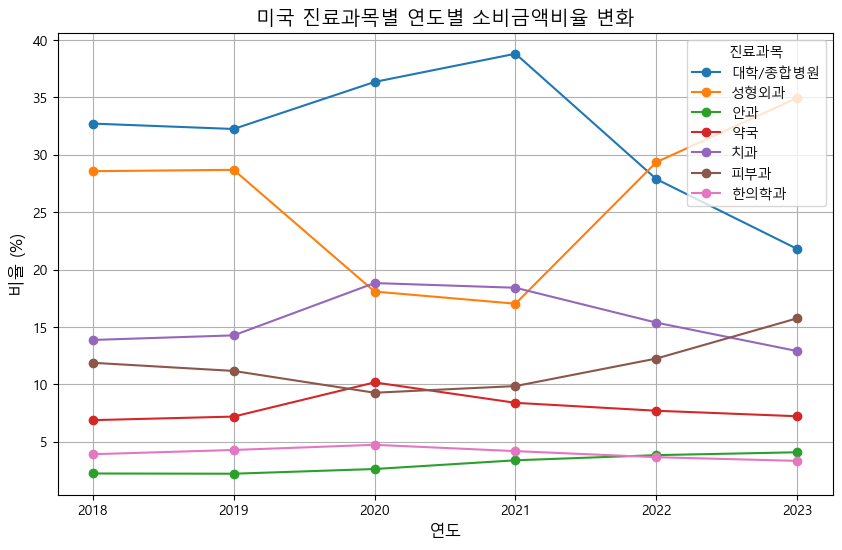

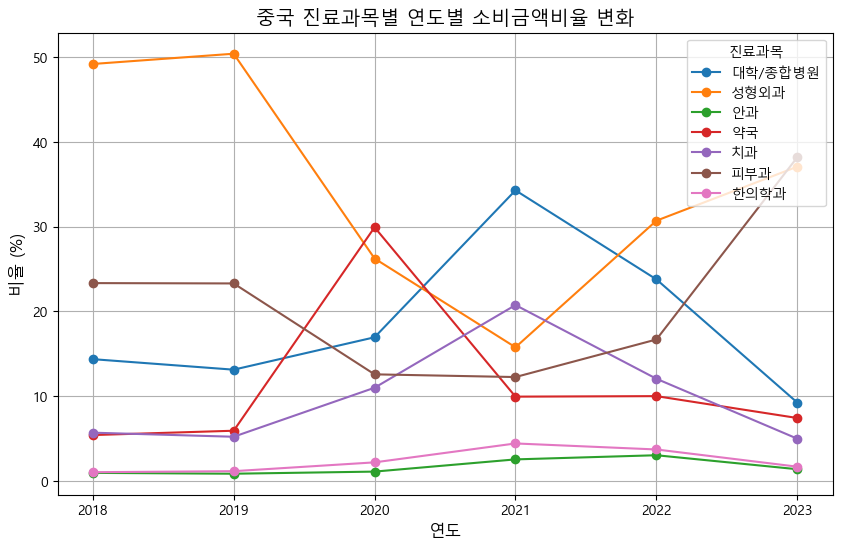

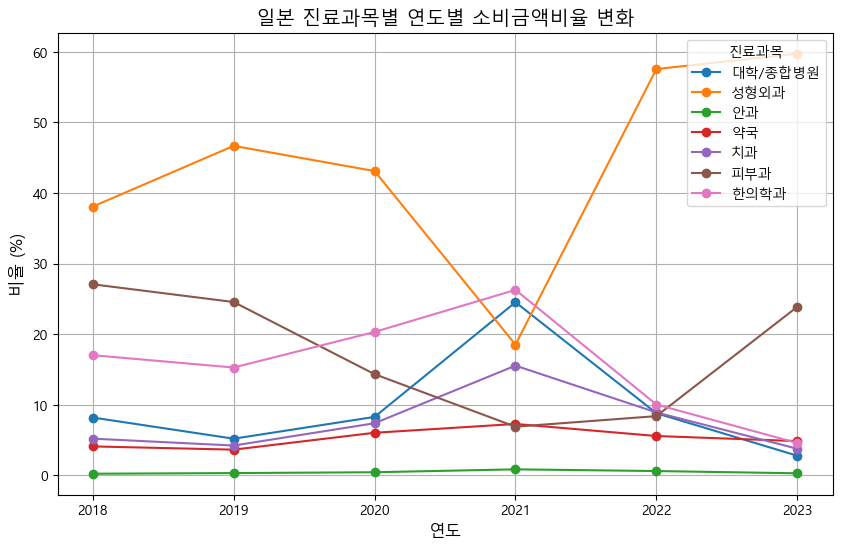

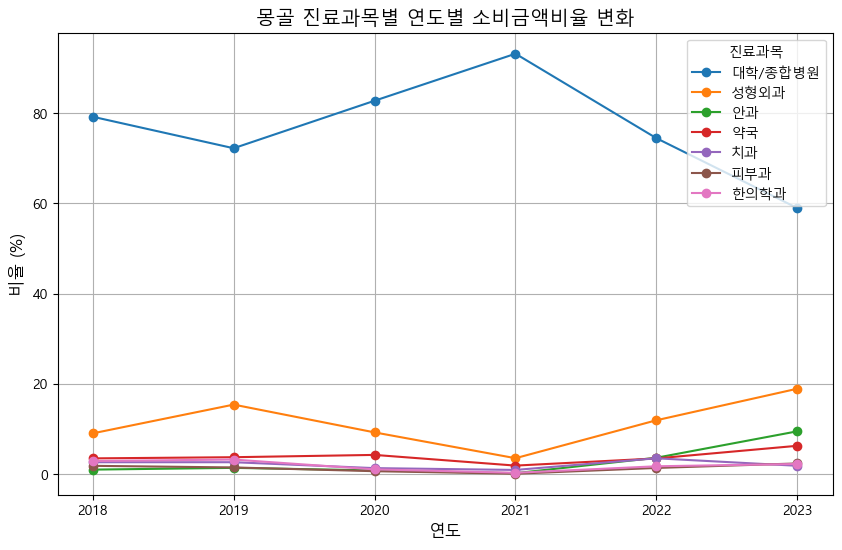

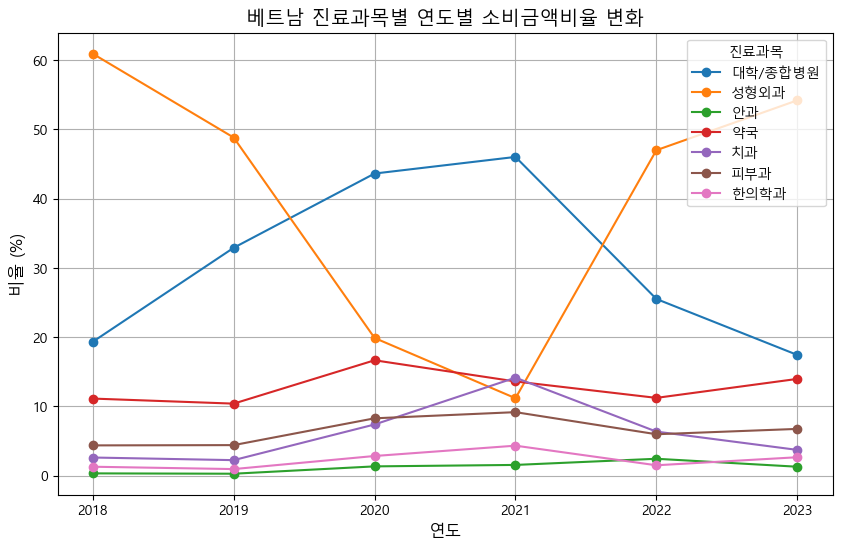

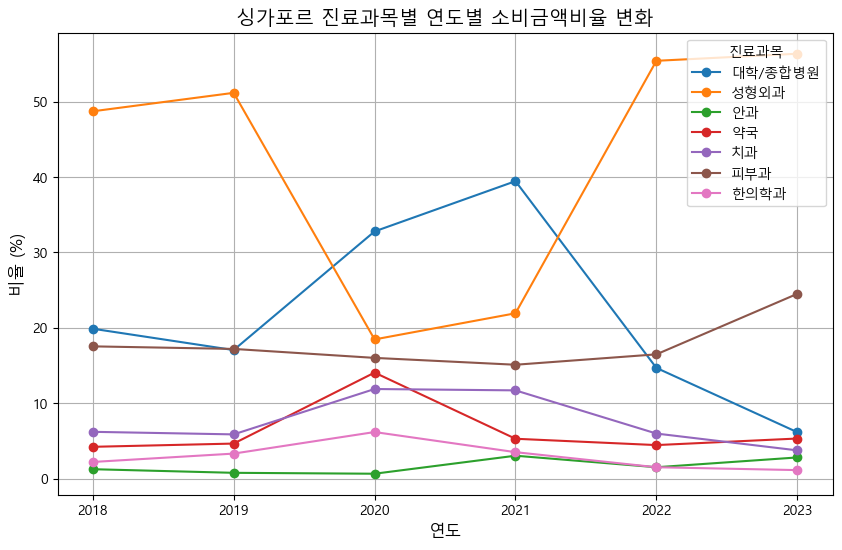

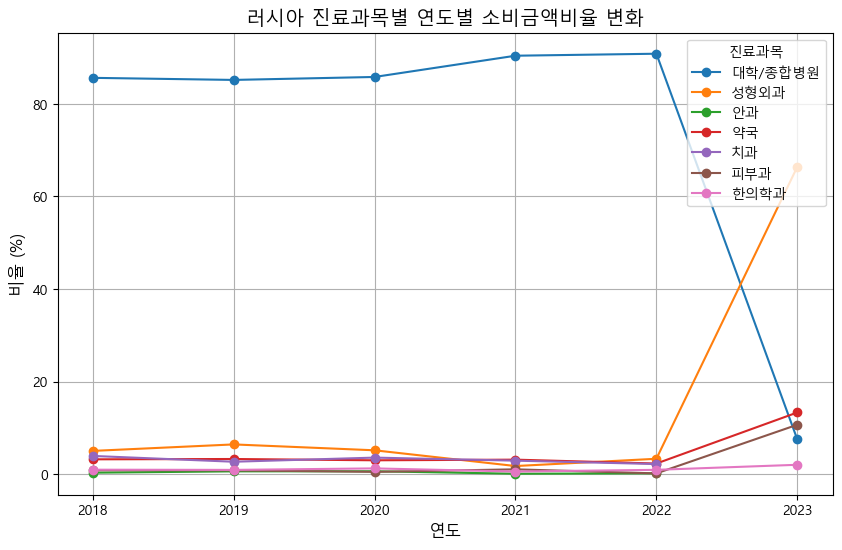

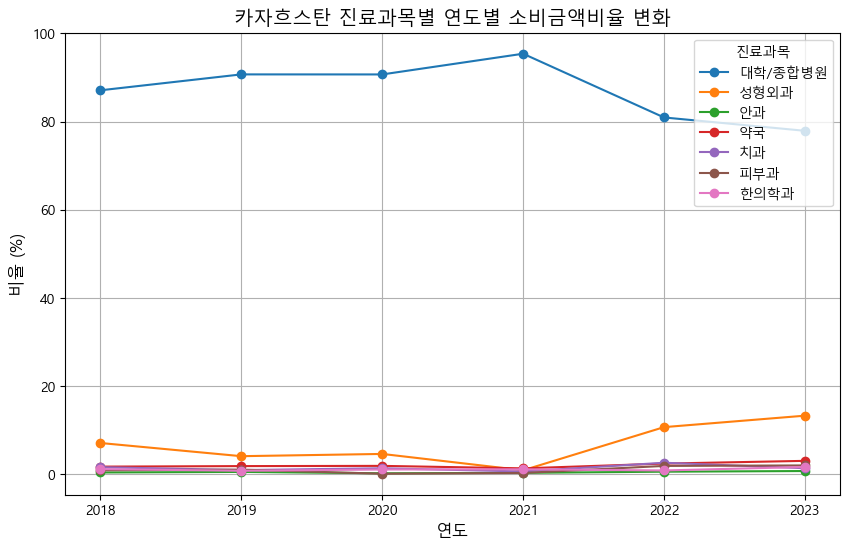

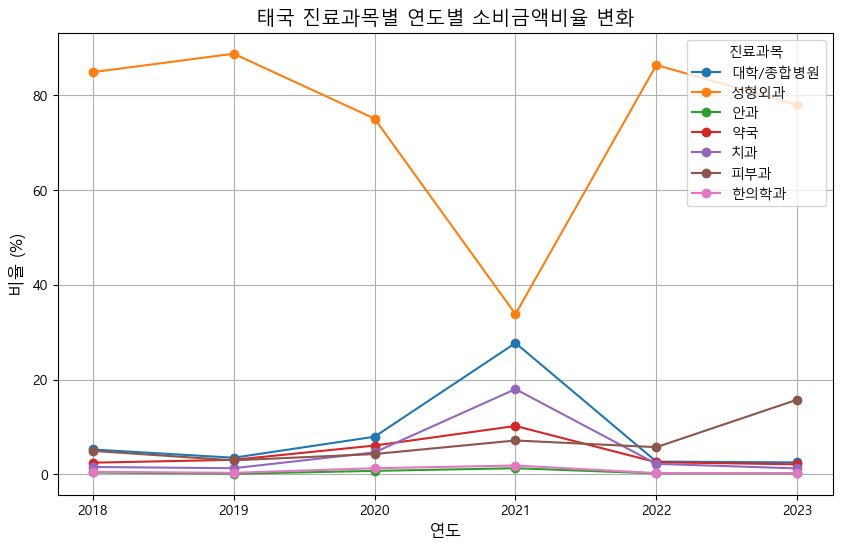

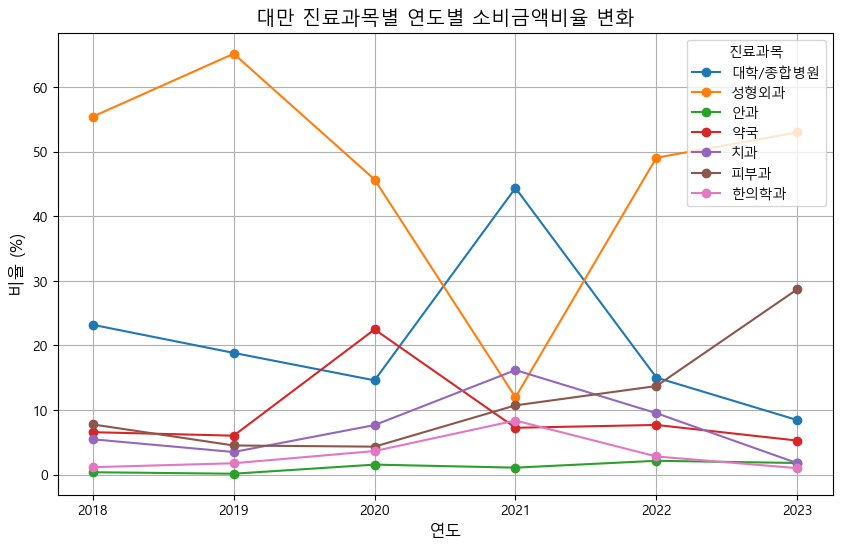

In [97]:
countryList=[]
for country in ['미국','중국','일본','몽골','베트남','싱가포르','러시아','카자흐스탄','태국','대만']:
    countryDF=cost_pivot[cost_pivot['국가명']==country]
    countryList.append(countryDF)
    
    countryList


    # 특정 국가의 진료과목별 연도별 변화 그래프

    plt.figure(figsize=(10, 6))
    for _, row in countryDF.iterrows():
        plt.plot(countryDF.columns[2:], row[2:], marker='o', label=row['진료과목'])

    plt.title(f'{country} 진료과목별 연도별 소비금액비율 변화', fontsize=14)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('비율 (%)', fontsize=12)
    plt.legend(title='진료과목',loc='upper right')
    plt.grid(True)
    plt.show()

- 데이터 시각화 : 각 국가마다 년도별 진료과목 소비건수

In [98]:
# 데이터프레임 피벗
num_pivot = numDF.pivot_table(
    index=["국가명", "진료과목"], 
    columns="년도", 
    values="소비건수비율"
).reset_index()

# 컬럼 이름 정리
num_pivot.columns.name = None  # 컬럼 이름에서 계층 제거
num_pivot = num_pivot.rename_axis(None, axis=1)  # 축 이름 제거

# 출력 확인
print(num_pivot)

   국가명     진료과목   2018   2019   2020   2021   2022   2023
0   대만  대학/종합병원  17.24  13.27  10.68  38.95  15.92   4.02
1   대만     성형외과   8.95  10.91   4.65   2.44   8.29  16.17
2   대만       안과   0.52   0.64   0.85   1.02   1.23   0.86
3   대만       약국  61.81  64.55  72.97  42.58  62.19  66.51
4   대만       치과   4.14   3.96   5.36   6.83   5.13   1.63
..  ..      ...    ...    ...    ...    ...    ...    ...
65  태국       안과   1.00   0.67   0.80   1.21   0.66   0.46
66  태국       약국  50.60  58.84  62.05  52.06  60.46  56.27
67  태국       치과   3.88   3.23   7.09  10.16   2.64   1.90
68  태국      피부과   9.64   5.36   4.13   5.67   6.39  15.11
69  태국     한의학과   1.45   1.44   2.20   2.75   0.68   0.63

[70 rows x 8 columns]


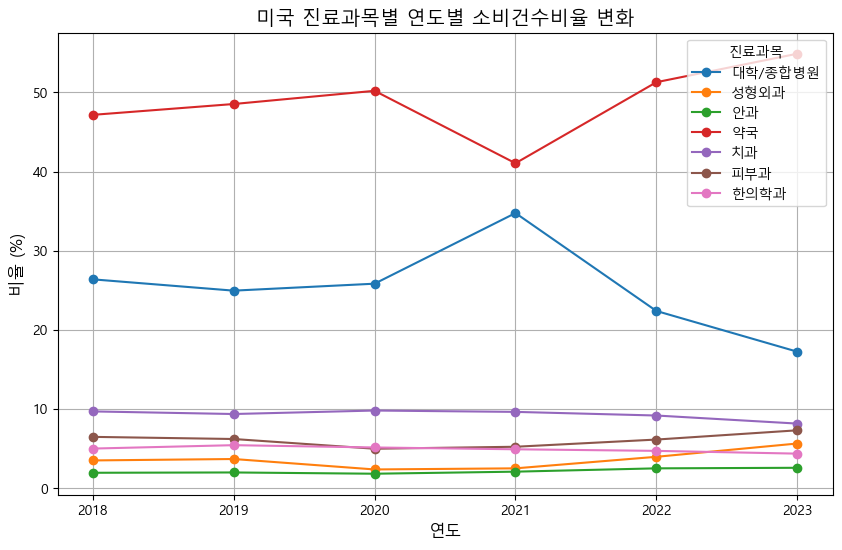

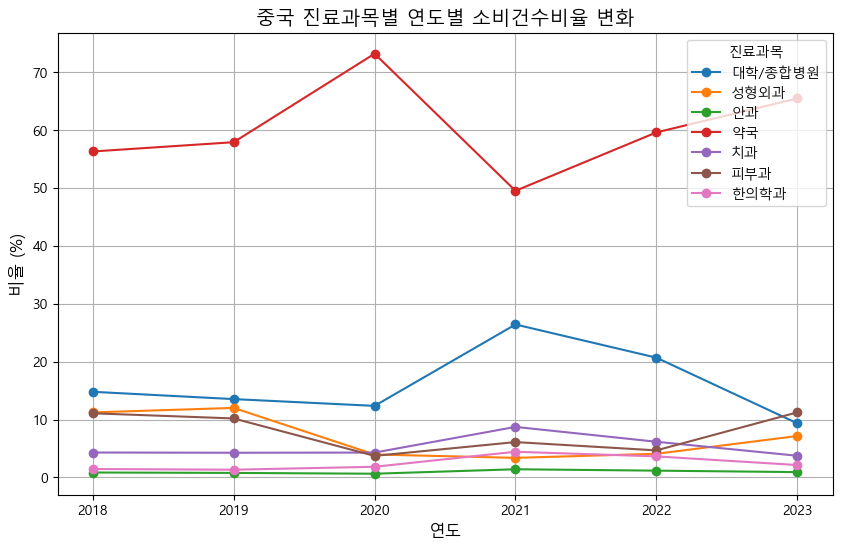

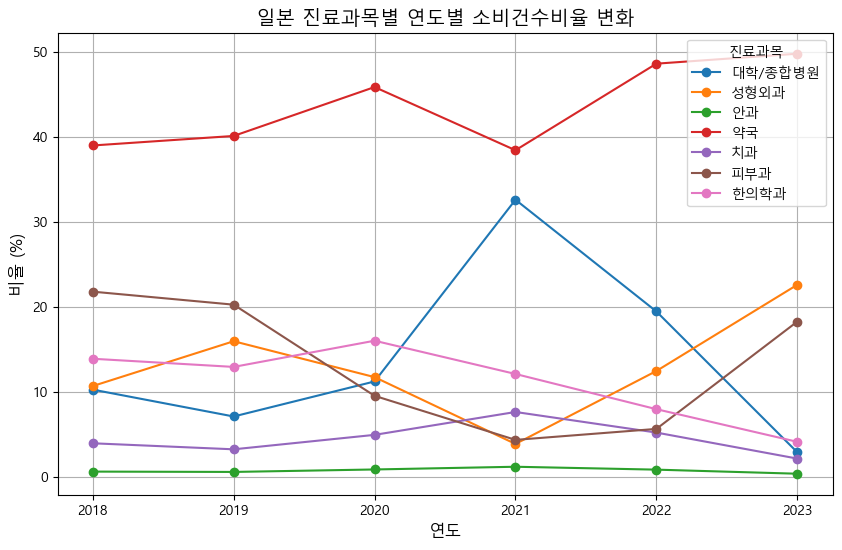

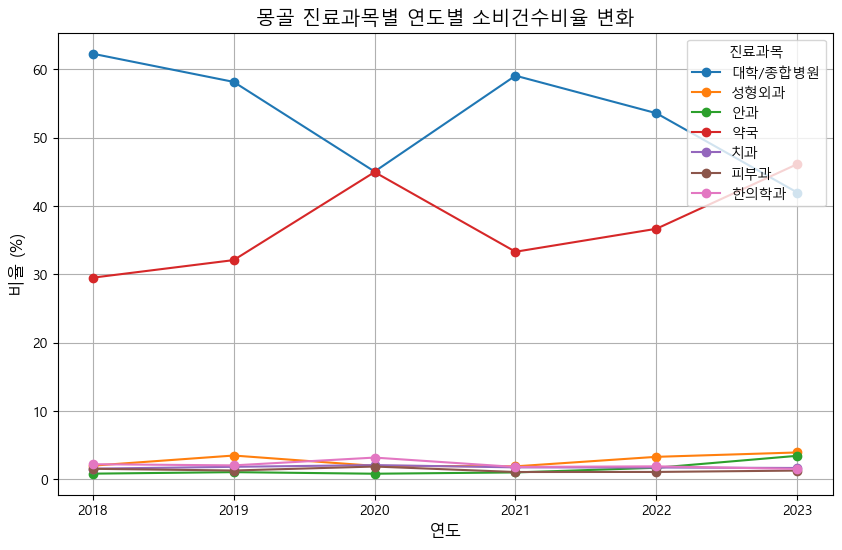

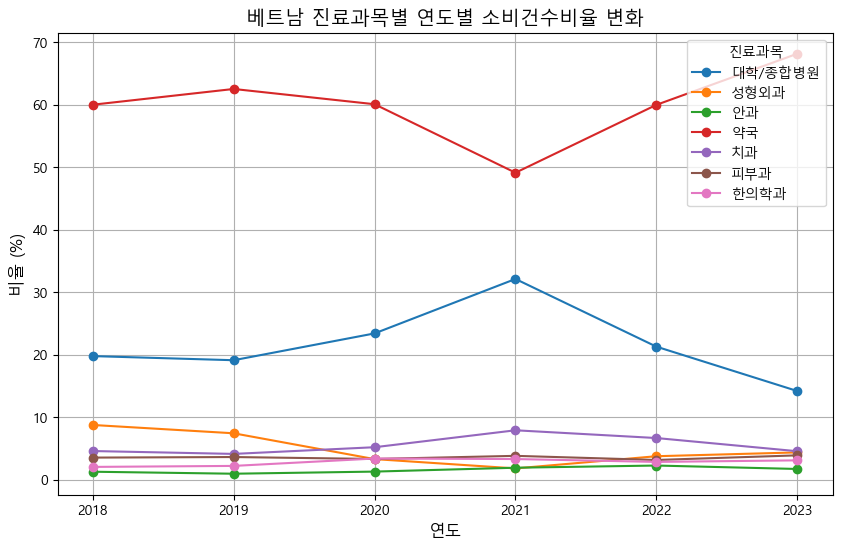

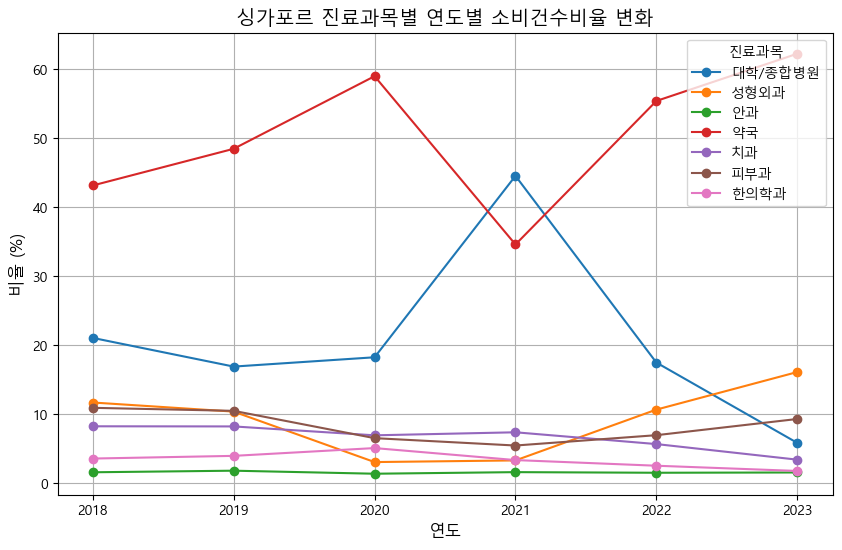

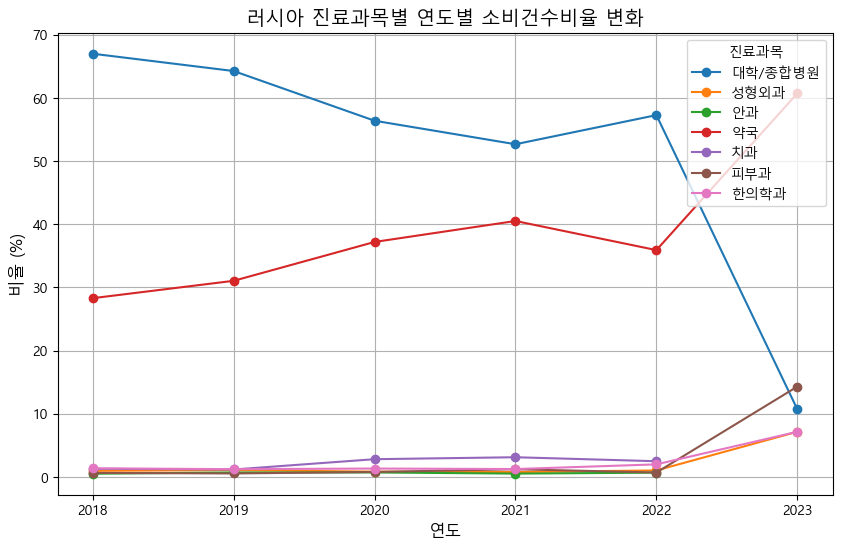

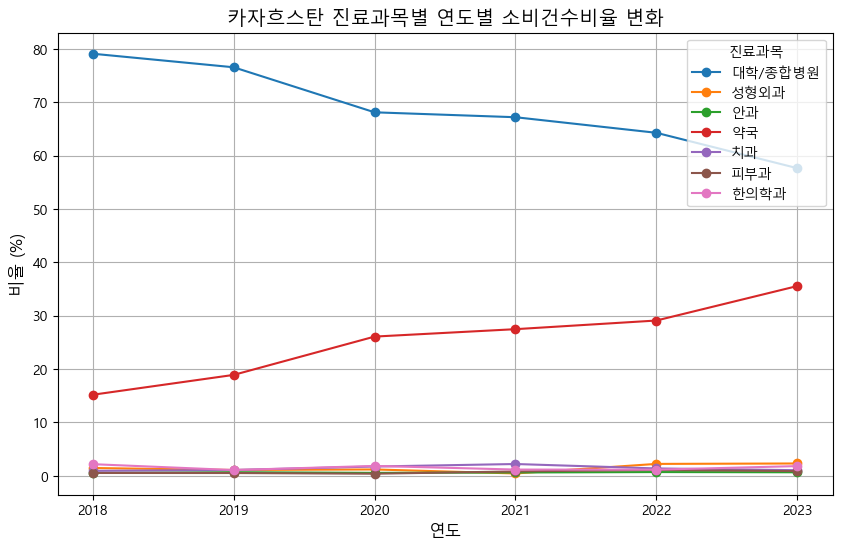

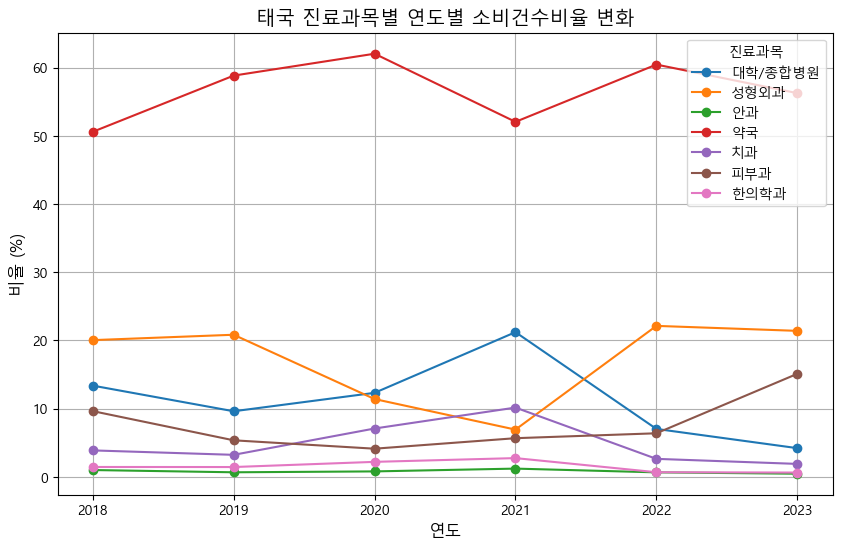

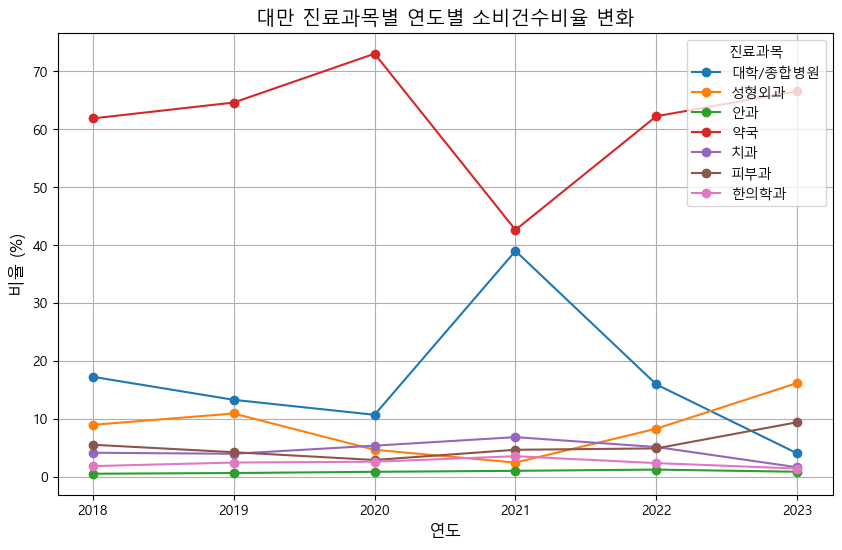

In [99]:
countryList=[]
for country in ['미국','중국','일본','몽골','베트남','싱가포르','러시아','카자흐스탄','태국','대만']:
    countryDF=num_pivot[num_pivot['국가명']==country]
    countryList.append(countryDF)
    
    countryList


    # 특정 국가의 진료과목별 연도별 변화 그래프

    plt.figure(figsize=(10, 6))
    for _, row in countryDF.iterrows():
        plt.plot(countryDF.columns[2:], row[2:], marker='o', label=row['진료과목'])

    plt.title(f'{country} 진료과목별 연도별 소비건수비율 변화', fontsize=14)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('비율 (%)', fontsize=12)
    plt.legend(title='진료과목',loc='upper right')
    plt.grid(True)
    plt.show()

- 데이터 시각화 : 각 국가마다 년도별 총 소비금액

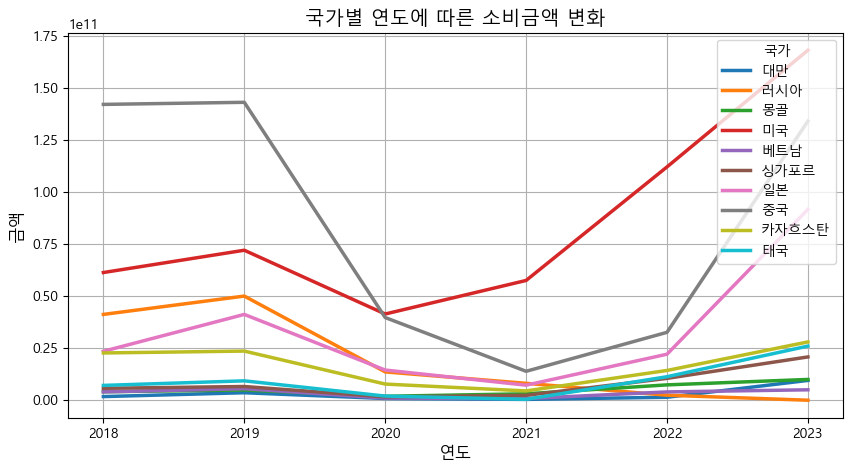

In [100]:
plt.figure(figsize=(10, 5))
for idx in changeCost2.index:
    plt.plot(changeCost2.columns,changeCost2.loc[idx],label=idx,lw=2.5)

plt.title(f'국가별 연도에 따른 소비금액 변화', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('금액', fontsize=12)
plt.legend(title='국가',loc='upper right')
plt.grid(True)
plt.show()

- 데이터 시각화 : 각 국가마다 년도별 총 소비건수

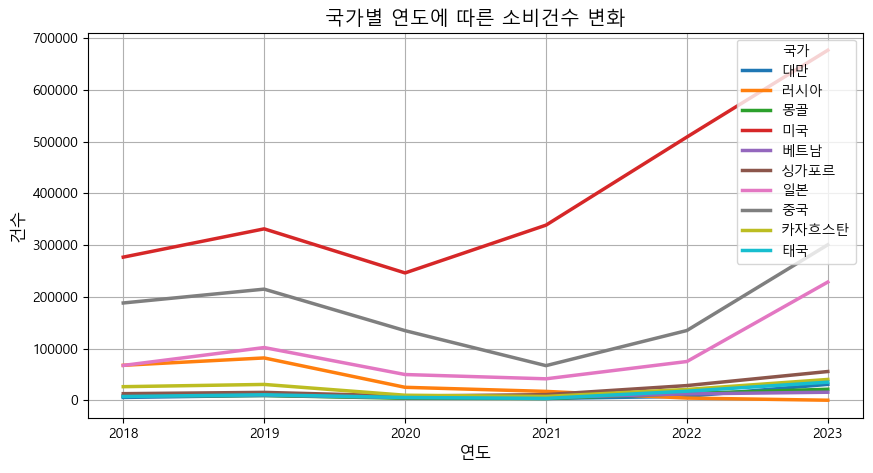

In [101]:
plt.figure(figsize=(10, 5))
for idx in changeNum2.index:
    plt.plot(changeNum2.columns,changeNum2.loc[idx],label=idx,lw=2.5)

plt.title(f'국가별 연도에 따른 소비건수 변화', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.legend(title='국가',loc='upper right')
plt.grid(True)
plt.show()

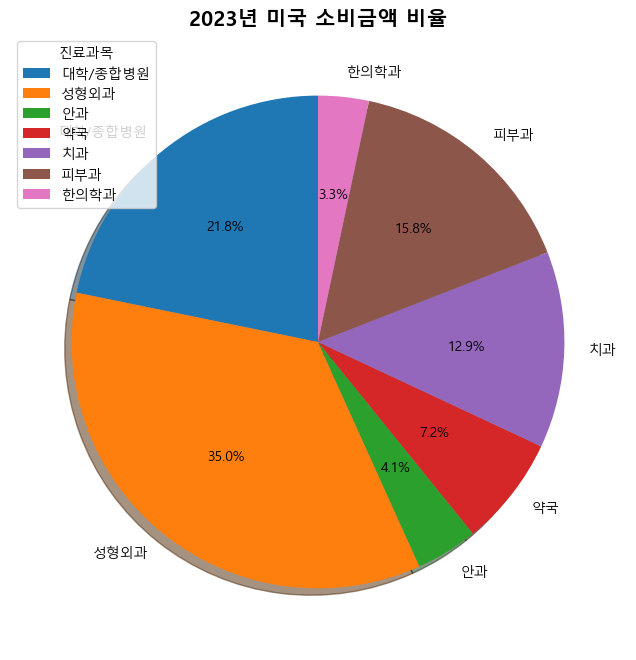

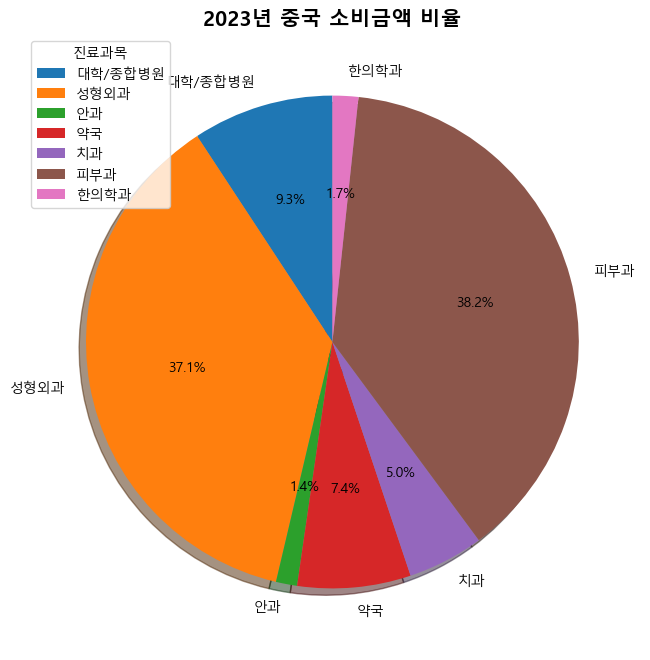

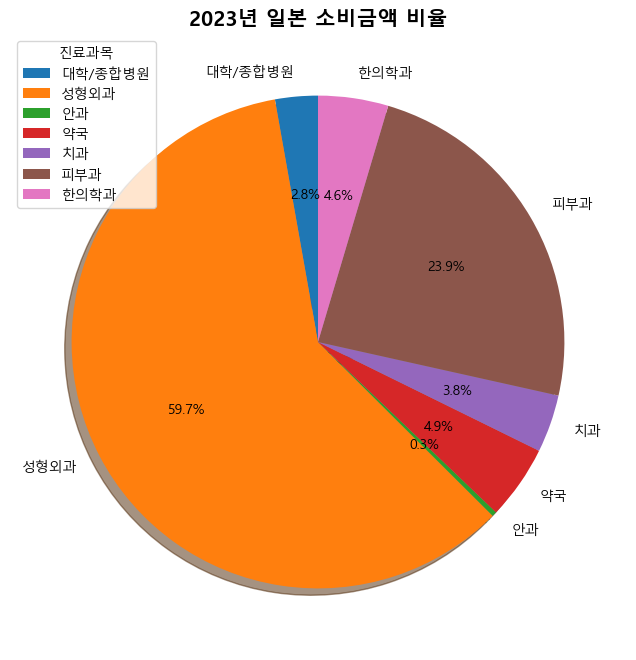

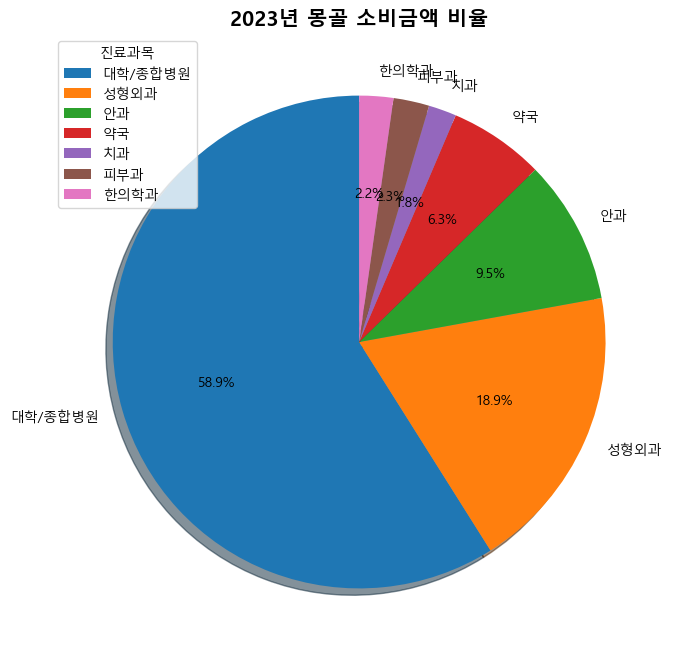

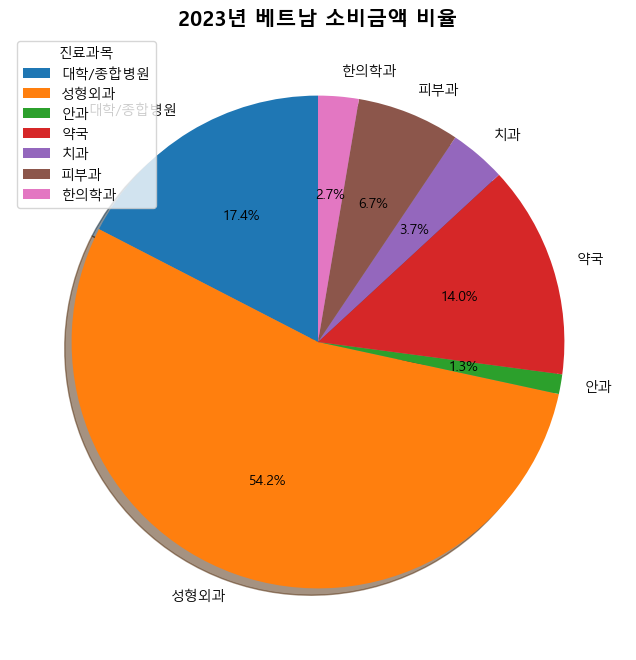

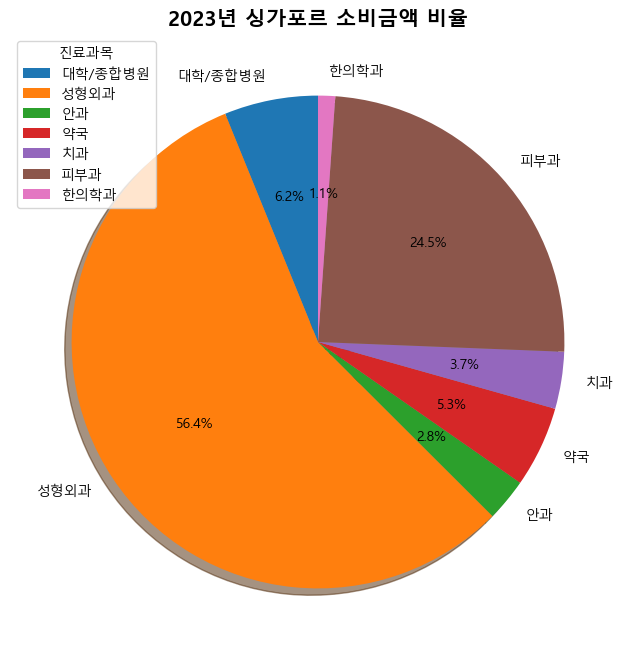

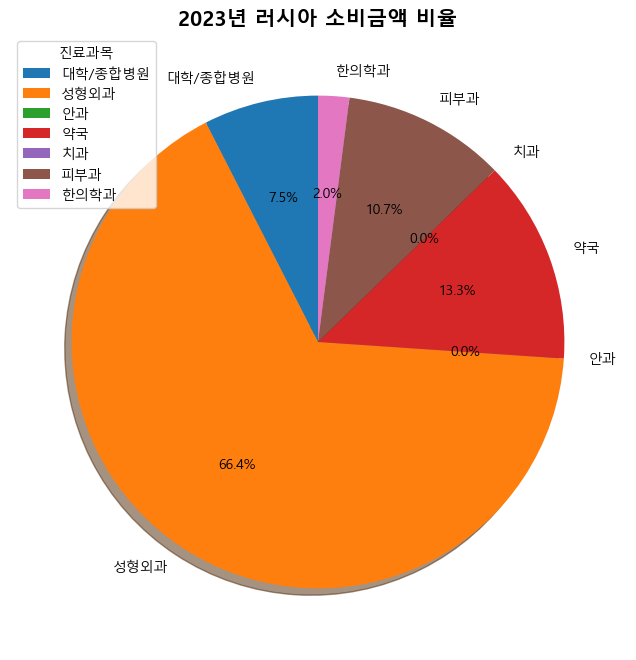

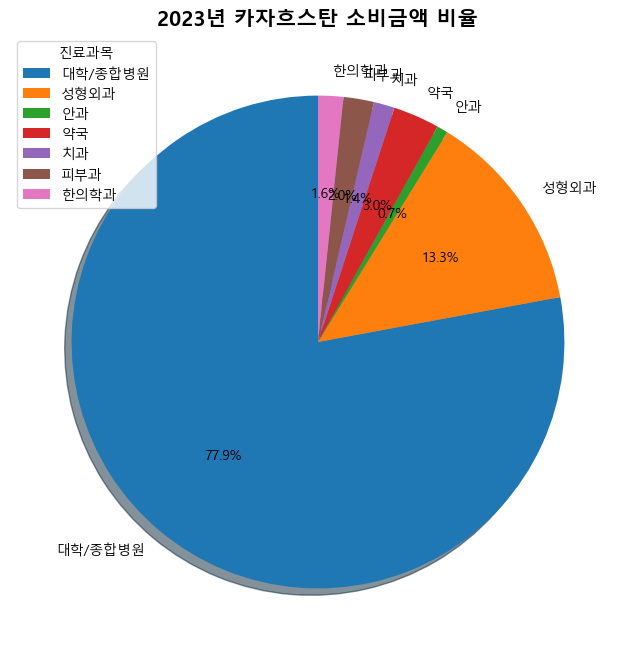

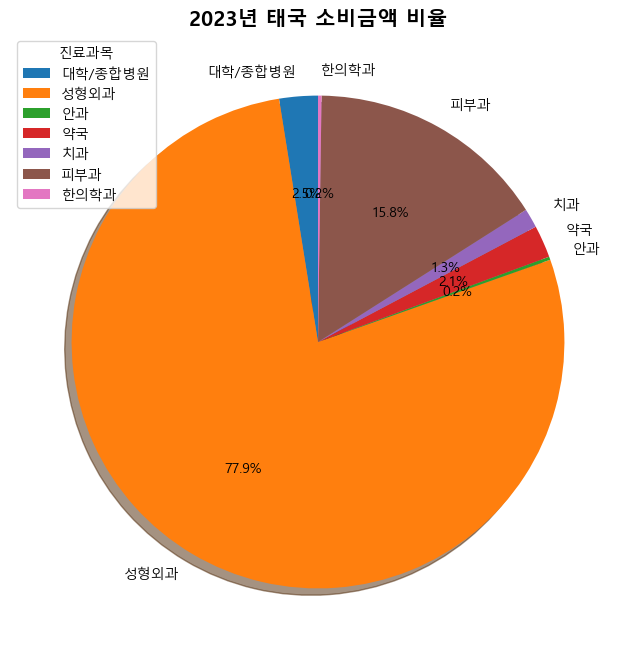

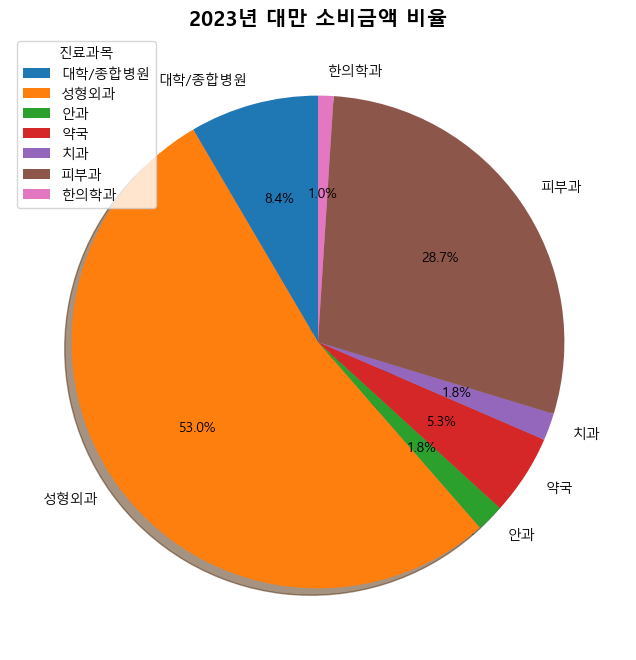

In [126]:
# 2023년 각 국가의 진료과목 소비금액비율
for country in ['미국','중국','일본','몽골','베트남','싱가포르','러시아','카자흐스탄','태국','대만']:
    plt.figure(figsize=(8,8))
    plt.pie(changeCost.xs(country,level='국가명')[2023], labels=changeCost.xs(country,level='국가명')[2023].index,
            autopct='%1.1f%%',
            shadow=True,
            startangle=90
            )
    plt.title(f'2023년 {country} 소비금액 비율', fontdict={'fontsize':15,'fontweight':'bold'})
    plt.legend(title='진료과목',loc='upper left')
    plt.show()


In [108]:
changeCost.xs('대만',level='국가명')[2023]

진료과목
대학/종합병원     8.45
성형외과       52.97
안과          1.81
약국          5.28
치과          1.78
피부과        28.70
한의학과        1.01
Name: 2023, dtype: float64

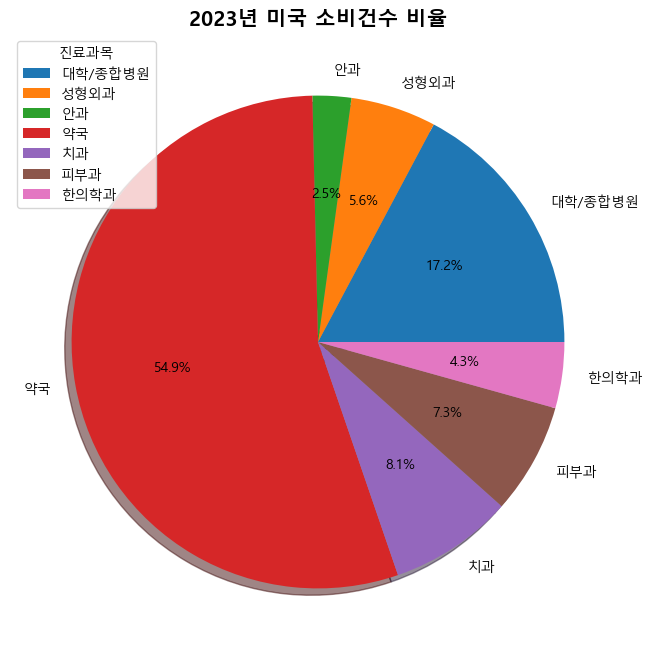

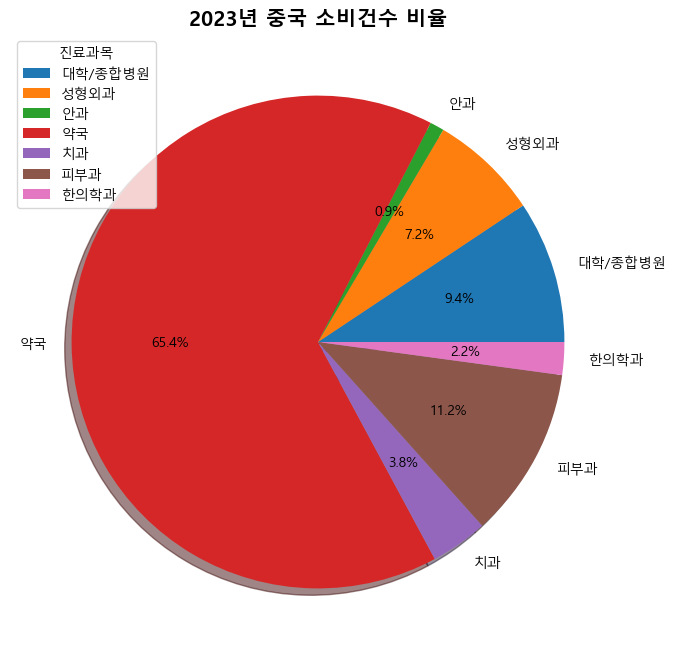

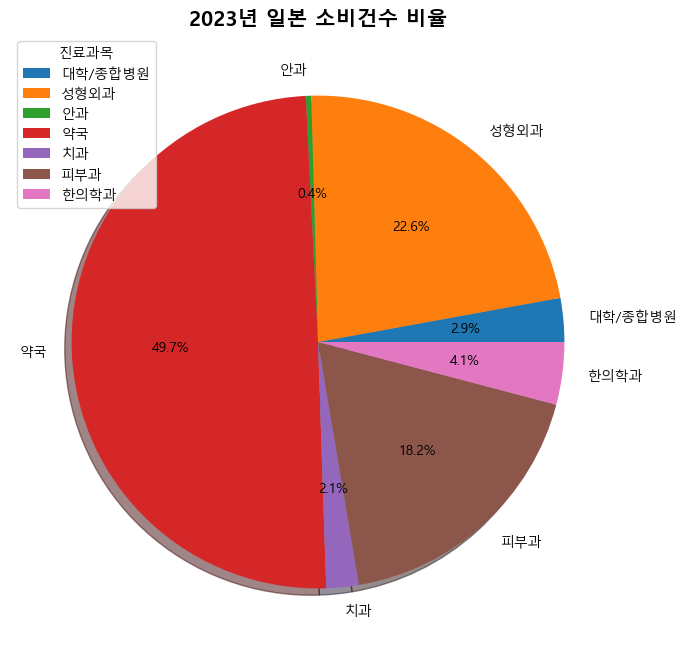

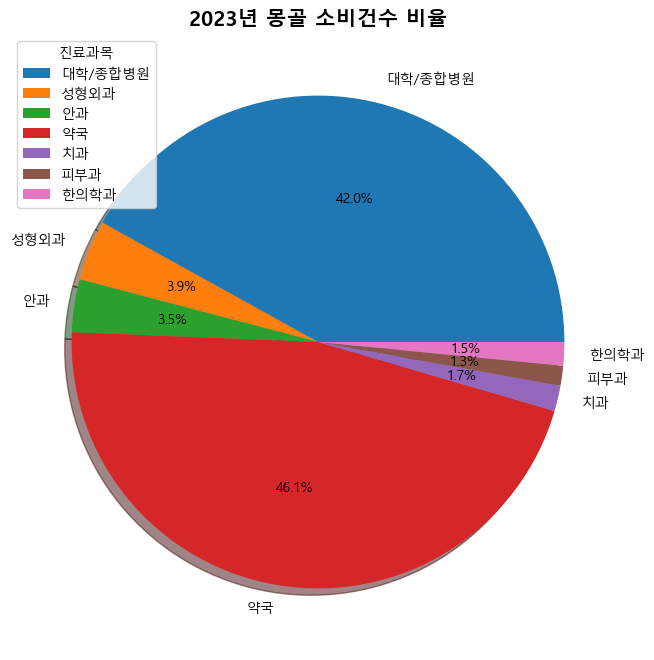

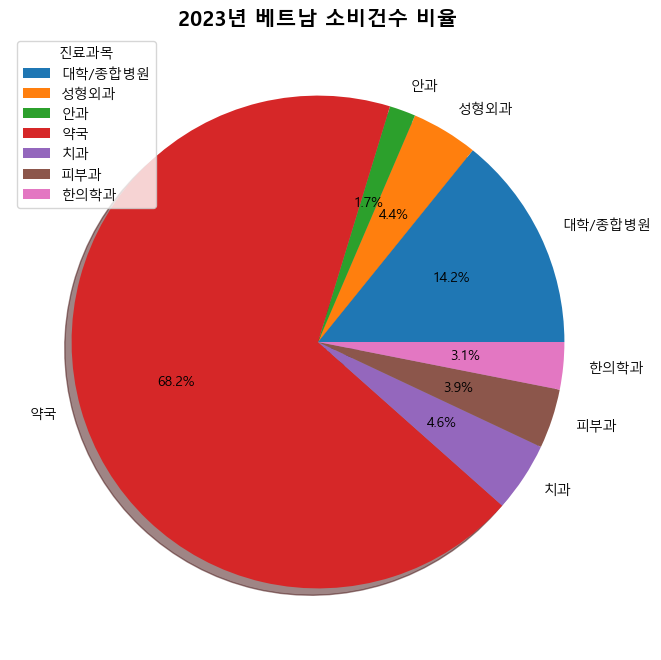

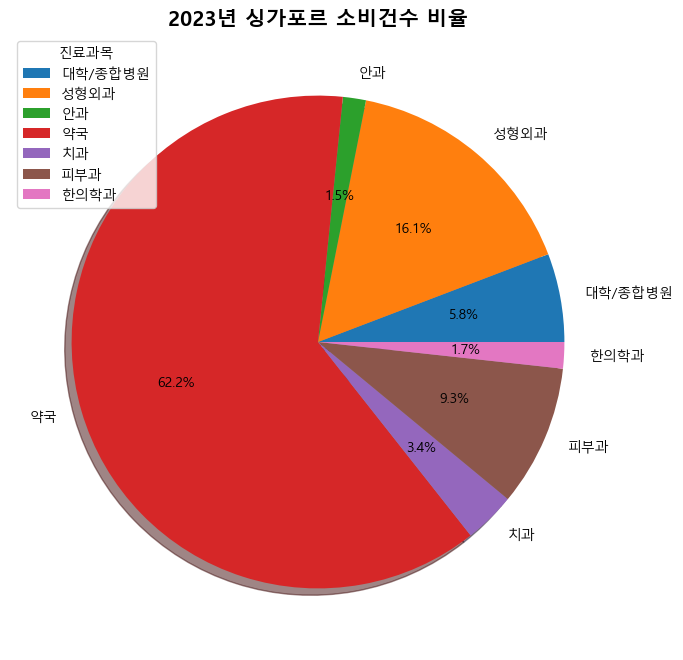

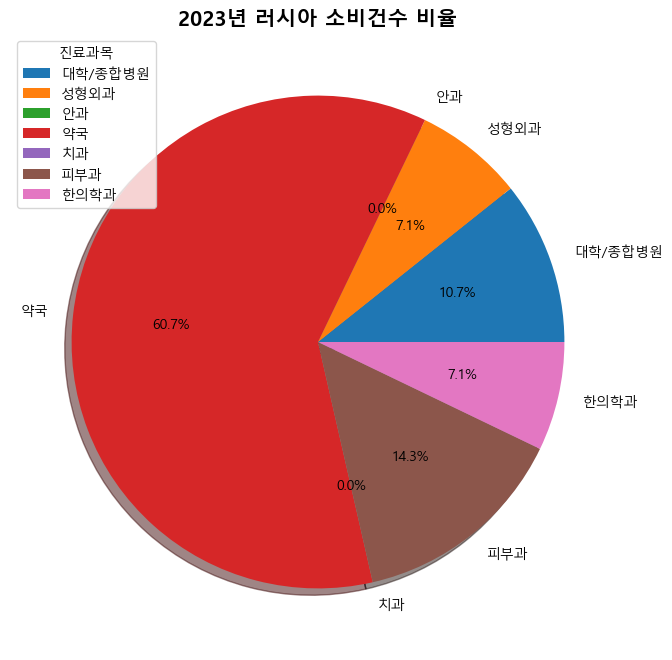

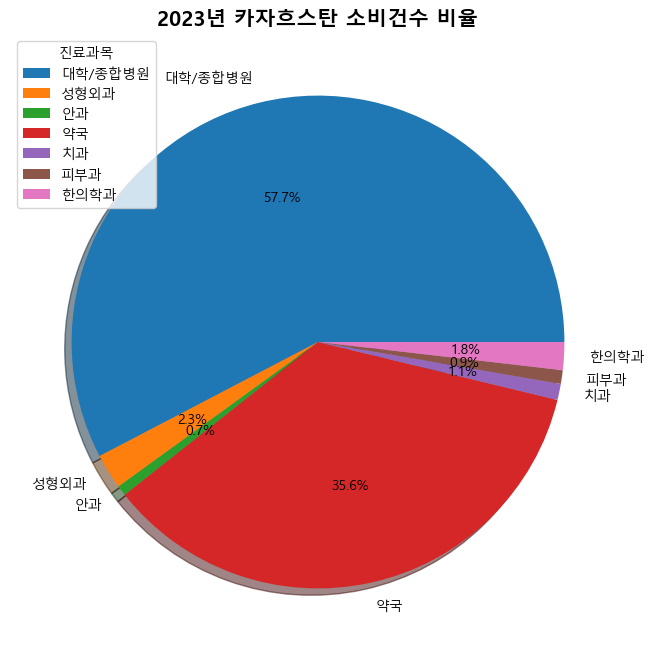

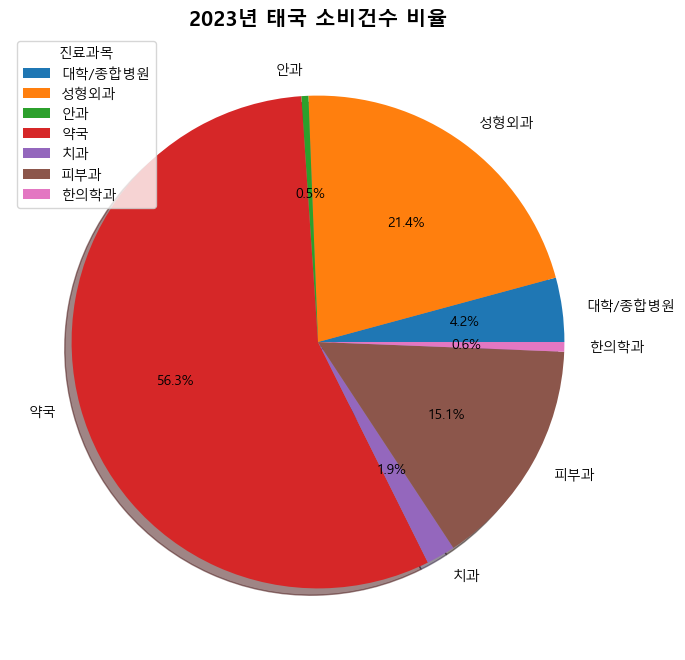

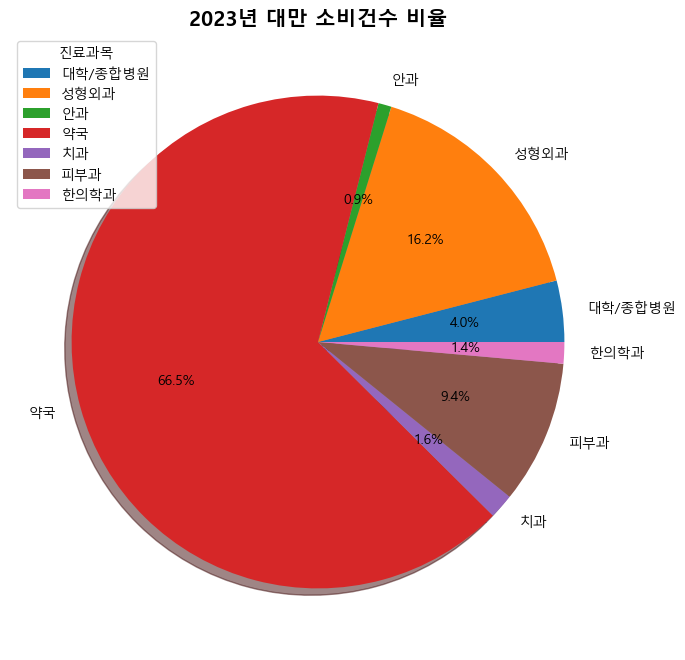

In [125]:
# 2023년 각 국가의 진료과목 소비건수비율
for country in ['미국','중국','일본','몽골','베트남','싱가포르','러시아','카자흐스탄','태국','대만']:
    plt.figure(figsize=(8,8))
    plt.pie(changeNum.xs(country,level='국가명')[2023], labels=changeNum.xs(country,level='국가명')[2023].index,
            autopct='%1.1f%%',
            shadow=True,
            radius=1
            )
    plt.title(f'2023년 {country} 소비건수 비율', fontdict={'fontsize':15,'fontweight':'bold'})
    plt.legend(title='진료과목',loc='upper left')
    plt.show()
